In [14]:
import pandas as pd 
import seaborn as sb 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [15]:
lesionados_data = pd.DataFrame(pd.read_csv('proy_datasets/LESIONADO.csv'))

In [16]:
lesionados_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261293 entries, 0 to 261292
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   X                     261293 non-null  float64
 1   Y                     261293 non-null  float64
 2   OBJECTID              261293 non-null  int64  
 3   CODIGO_ACCIDENTADO    261293 non-null  int64  
 4   FORMULARIO            261293 non-null  object 
 5   FECHA_OCURRENCIA_ACC  261293 non-null  object 
 6   HORA_OCURRENCIA_ACC   261293 non-null  object 
 7   ANO_OCURRENCIA_ACC    261293 non-null  int64  
 8   MES_OCURRENCIA_ACC    261293 non-null  object 
 9   DIA_OCURRENCIA_ACC    261293 non-null  object 
 10  FECHA_HORA_ACC        261293 non-null  object 
 11  DIRECCION             261293 non-null  object 
 12  CLASE_ACC             261258 non-null  object 
 13  LOCALIDAD             261270 non-null  object 
 14  CODIGO_VEHICULO       199320 non-null  float64
 15  

In [17]:
lesionados_data.isna().sum()

X                           0
Y                           0
OBJECTID                    0
CODIGO_ACCIDENTADO          0
FORMULARIO                  0
FECHA_OCURRENCIA_ACC        0
HORA_OCURRENCIA_ACC         0
ANO_OCURRENCIA_ACC          0
MES_OCURRENCIA_ACC          0
DIA_OCURRENCIA_ACC          0
FECHA_HORA_ACC              0
DIRECCION                   0
CLASE_ACC                  35
LOCALIDAD                  23
CODIGO_VEHICULO         61973
CONDICION                   0
GENERO                    206
EDAD                     1721
CONDICION_VEHICULO          0
dtype: int64

In [18]:
# Reemplazar cadenas vacías o espacios con NaN
lesionados_data.replace(["", "SIN INFORMACION"," ", "NaN", "null"], np.nan, inplace=True)

# Ahora aplicar dropna()
lesionados_data.dropna(inplace=True)

In [19]:
lesionados_data.info()
# Obtenemos finalmente una tabla sin valores nulos

<class 'pandas.core.frame.DataFrame'>
Index: 198419 entries, 0 to 261292
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   X                     198419 non-null  float64
 1   Y                     198419 non-null  float64
 2   OBJECTID              198419 non-null  int64  
 3   CODIGO_ACCIDENTADO    198419 non-null  int64  
 4   FORMULARIO            198419 non-null  object 
 5   FECHA_OCURRENCIA_ACC  198419 non-null  object 
 6   HORA_OCURRENCIA_ACC   198419 non-null  object 
 7   ANO_OCURRENCIA_ACC    198419 non-null  int64  
 8   MES_OCURRENCIA_ACC    198419 non-null  object 
 9   DIA_OCURRENCIA_ACC    198419 non-null  object 
 10  FECHA_HORA_ACC        198419 non-null  object 
 11  DIRECCION             198419 non-null  object 
 12  CLASE_ACC             198419 non-null  object 
 13  LOCALIDAD             198419 non-null  object 
 14  CODIGO_VEHICULO       198419 non-null  float64
 15  CONDI

In [20]:
lesionados_data["CLASE_ACC"].value_counts()

CLASE_ACC
CHOQUE               159125
ATROPELLO             14317
CAIDA DE OCUPANTE     11097
VOLCAMIENTO            7312
OTRO                   4386
AUTOLESION             2168
INCENDIO                 14
Name: count, dtype: int64

In [21]:
lesionados_data["CONDICION"].value_counts()

CONDICION
MOTOCICLISTA    79900
PASAJERO        70720
CONDUCTOR       24751
CICLISTA        22610
PEATON            438
Name: count, dtype: int64

In [22]:
lesionados_data["GENERO"].value_counts() 
# Eliminamos aquellos campos que no contenian información del genero
# para asi poder trabajr con dummy variables

GENERO
MASCULINO    136282
FEMENINO      62137
Name: count, dtype: int64

In [23]:
dummies = pd.get_dummies(lesionados_data["GENERO"],dtype=int)
dummies

,FEMENINO,MASCULINO
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
261288,0,1
261289,1,0
261290,0,1
261291,0,1


In [28]:
#lesionados_data = lesionados_data.join(Dummies)
lesionados_data.drop("GENERO", axis=1, inplace=True)

In [30]:
lesionados_data.drop("MASCULINO", axis=1, inplace=True)
lesionados_data.rename(columns={"FEMENINO": "GENERO"}, inplace=True)

In [33]:
lesionados_data.drop("OBJECTID", axis=1, inplace=True)
lesionados_data.head(5)
# Actualizamos la tabla con la columna de genero donde 1 es femenino y 0 masculino

,X,Y,CODIGO_ACCIDENTADO,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,FECHA_HORA_ACC,DIRECCION,CLASE_ACC,LOCALIDAD,CODIGO_VEHICULO,CONDICION,EDAD,CONDICION_VEHICULO,GENERO
0,-74.113464,4.570914,12857419,A001568839,2023/03/24 05:00:00+00,20:45:00,2023,MARZO,VIERNES,2023/03/25 01:45:00+00,DG 32 H S- KR 12 I 02,ATROPELLO,RAFAEL URIBE URIBE,1.0,PASAJERO,19.0,MOTOCICLISTA,1
1,-74.113464,4.570914,12857413,A001568839,2023/03/24 05:00:00+00,20:45:00,2023,MARZO,VIERNES,2023/03/25 01:45:00+00,DG 32 H S- KR 12 I 02,ATROPELLO,RAFAEL URIBE URIBE,1.0,MOTOCICLISTA,19.0,MOTOCICLISTA,0
2,-74.108231,4.691667,12857426,A001568759,2023/03/24 05:00:00+00,21:40:00,2023,MARZO,VIERNES,2023/03/25 02:40:00+00,KR 86 - CL 69 02,CHOQUE,ENGATIVA,1.0,PASAJERO,51.0,ACOMPAÑANTE,0
3,-74.108231,4.691667,12857422,A001568759,2023/03/24 05:00:00+00,21:40:00,2023,MARZO,VIERNES,2023/03/25 02:40:00+00,KR 86 - CL 69 02,CHOQUE,ENGATIVA,1.0,CONDUCTOR,37.0,CONDUCTOR,1
4,-74.121528,4.517969,12857423,A001568790,2023/03/24 05:00:00+00,18:55:00,2023,MARZO,VIERNES,2023/03/24 23:55:00+00,TV 14 V - CL 73 BIS S 02,CHOQUE,USME,1.0,CONDUCTOR,55.0,CONDUCTOR,0


array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'CODIGO_ACCIDENTADO'}>],
       [<Axes: title={'center': 'ANO_OCURRENCIA_ACC'}>,
        <Axes: title={'center': 'CODIGO_VEHICULO'}>,
        <Axes: title={'center': 'EDAD'}>],
       [<Axes: title={'center': 'GENERO'}>, <Axes: >, <Axes: >]],
      dtype=object)

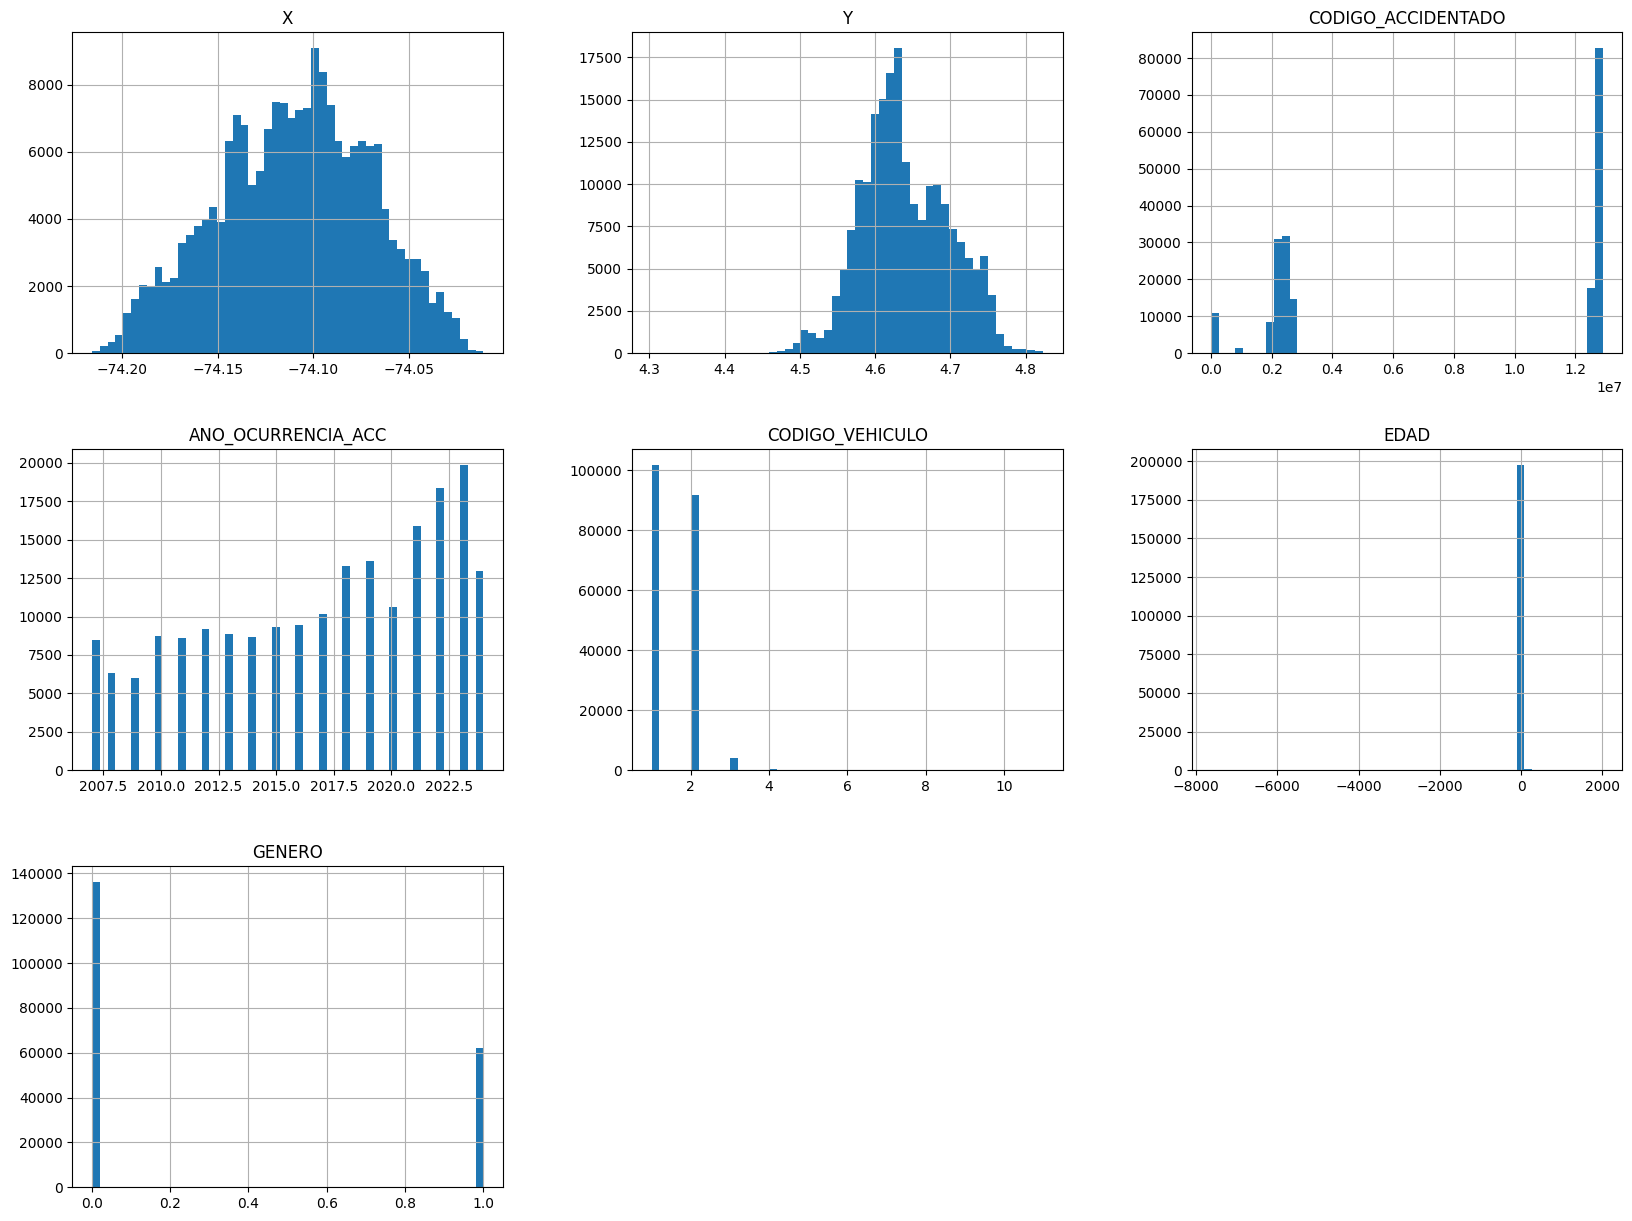

In [ ]:
lesionados_data.hist(bins=50, figsize=(20,15)) #Plots a histogram of the numerical attributes
# Importante. Graficar aquellos que tienen sentido análizar en un histograma

<Axes: xlabel='Y', ylabel='X'>

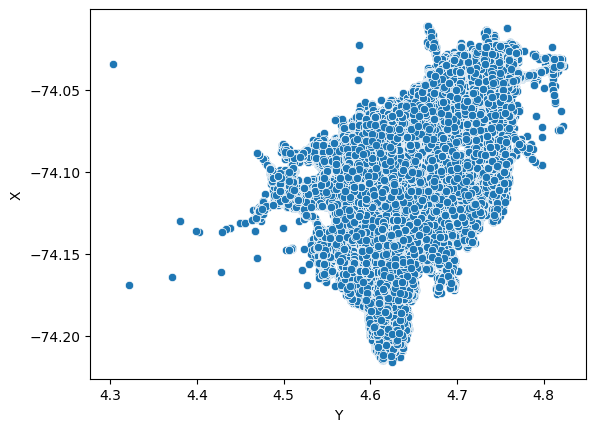

In [38]:
sb.scatterplot(x = "Y", y = "X", data = lesionados_data)

<Axes: xlabel='Y', ylabel='X'>

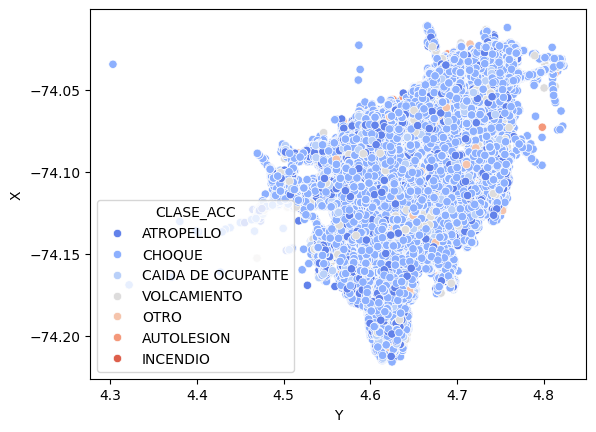

In [42]:
sb.scatterplot(x = "Y", y = "X", data = lesionados_data, hue = "CLASE_ACC", palette = "coolwarm")